# BLUE BANK LOAN ANALYSIS

### Tableau public link: https://public.tableau.com/app/profile/shravani.mahadeshwar/viz/BlueBank_16845221401200/Dashboard1?publish=yes

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

### Methods to read data from a json file

In [2]:
#Method 1
df1=pd.read_json('data_blue_bank.json')

In [3]:
df1.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
#Method 2
json_file=open('data_blue_bank.json')
df2=json.load(json_file)

In [6]:
#Method 3
with open('data_blue_bank.json') as json_file:
    df3=json.load(json_file)

**In both df2 and df3, our data is stored in a list data-structure.**

**Since lists are not ideal to work with we will be transforming it to a dataframe.**

In [7]:
data=pd.DataFrame(df2)

In [8]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### EDA

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [10]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [11]:
#Finding unique values along with number of times it occured.
data['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [12]:
#Using EXP() to get the exponents of the log annual income
data['annual_income']=np.exp(data['log.annual.inc'])
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,annual_income
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,85000.000385
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,65000.000073
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,31999.999943
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,85000.000385
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,80799.999636


In [13]:
#Categorizing FICO scores to improve interpretability.
length = len(data)
ficocat = []
for x in range(length):
    category = data['fico'][x]
    try:
        if 300 <= category < 400:
            cat = 'Very Poor'
        elif 400 <= category < 600:
            cat = 'Poor'
        elif 600 <= category < 660:
            cat = 'Fair'
        elif 660 <= category < 780:
            cat = 'Good'
        elif 780 <= category <= 850:
            cat = 'Excellent'
        else:
            cat = 'Unknown'
    except:
        cat = 'Unknown'
    ficocat.append(cat)
ficocat = pd.Series(ficocat)
data['fico_category'] = ficocat

In [14]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,annual_income,fico_category
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,85000.000385,Good
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,65000.000073,Good
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,31999.999943,Good
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,85000.000385,Good
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,80799.999636,Good


In [15]:
#Adding a new column to categorise the interest rates
data.loc[data['int.rate']>0.12,'int_rate_type']='High'
data.loc[data['int.rate']<=0.12,'int_rate_type']='Low'

In [16]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,annual_income,fico_category,int_rate_type
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,85000.000385,Good,Low
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,65000.000073,Good,Low
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,31999.999943,Good,High
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,85000.000385,Good,Low
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,80799.999636,Good,High


fico_category
Excellent     521
Fair          489
Good         8568
dtype: int64


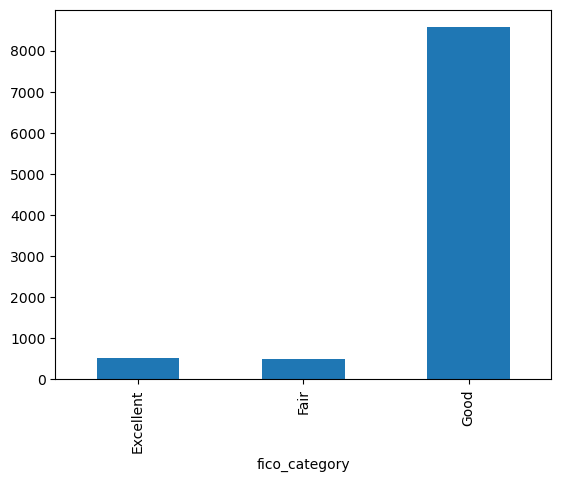

purpose
all_other             2331
credit_card           1262
debt_consolidation    3957
educational            343
home_improvement       629
major_purchase         437
small_business         619
dtype: int64


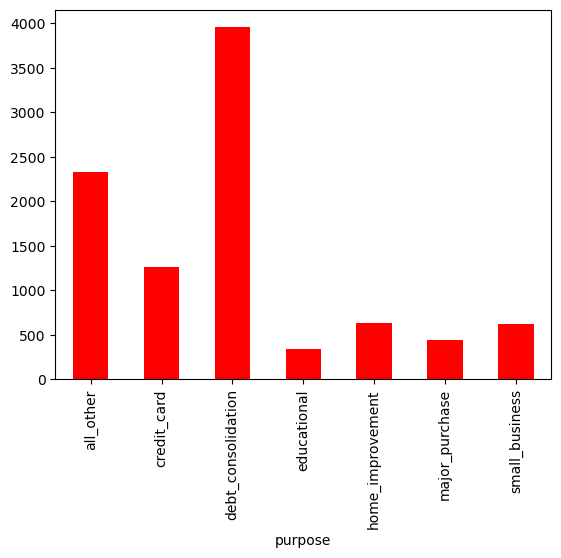

In [17]:
#Plotting number of loans by fico category
cat_fico=data.groupby(['fico_category']).size()
print(cat_fico)
cat_fico.plot.bar()
plt.show()
ct_purpose=data.groupby(data['purpose']).size()
print(ct_purpose)
ct_purpose.plot.bar(color='red')
plt.show()

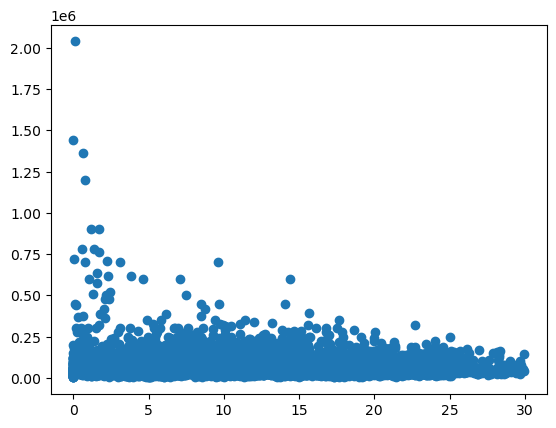

In [18]:
#Plotting debt against income
x=data['dti']
y=data['annual_income']
plt.scatter(x,y)
plt.show()

**From the scatter plot we can say higher the income less the debt**

In [19]:
#Exporting as a csv
data.to_csv('LoanAnalysisData.csv',index=True)

### Columns in the dataset

1. **credit.policy: 1 if the customer meets the credit underwriting criteria of Blue Bank, and 0
   otherwise.**
   
2. **purpose: The purpose of the loan (takes values "credit_card","debt_consolidation","educational","major_purchase","small_business", and"all_other").**

3. **int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11).Borrowers judged by Blue Bank to be more risky are assigned higher interest rates.**

4. **installment: The monthly installments owed by the borrower if the loan is funded.**

5. **log.annual.inc: The natural log of the self-reported annual income of the borrower.**

6. **dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income)**
- dti>1 then borrower has more debt than income.
- dti<1 then borrower has more income than debt

7. **fico: The FICO credit score of the borrower**
- 300 - 400: Very Poor
- 401 - 600: Poor
- 601 - 660: Fair
- 661 - 780: Good
- 781 - 850: Excellent

8. **days.with.cr.line: The number of days the borrower has had a credit line.**

9. **revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card
    billing cycle)**

10. **revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).**

11. **inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months. (If there are a lot of inquiries, that’s an issue)**

12. **delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.**

13. **pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens,or judgments).**